# Neural network construction using numpy only.
## Arbitrary neural architectures are allowed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#sigmoid activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
#squared_error loss function
def squared_error(y1,y2):
    return (y1-y2)**2

In [4]:
class neuron():
    def __init__(self,weights,activation):
        self.weights=weights
        self.activation=activation
        self.dif=np.zeros(weights.size)
        
    def zero_dif(self):
        self.dif=np.zeros(self.weights.size)
        
    def predict(self,x):
        
        # adding bias
        one_array=np.expand_dims(np.ones(x.shape[:-1]),axis=1)
        x=np.concatenate([one_array,x],axis=1)
        
        z=np.inner(x,self.weights)
        a=self.activation(z)
        
        prediction=np.array([a]).transpose()
        
        return prediction


In [5]:
class neural_network():
    
    #the graph represents neuron conections
    #cost is the cost function
    #alpha is the learning rate
    #delta is the offset used to calculate the gradient of the weights numerically
    def __init__(self,graph,cost,alpha=10**(-2),delta=10**(-8)):
        self.graph=graph
        self.cost=cost
        self.neurons=[]
        self.alpha=alpha
        self.delta=delta
        
        self.neurons=[]
        for dict_input in graph:
            for neuron in dict_input:
                self.neurons.append(neuron)
    
    # predicts, the outcome, given input x.
    def predict(self,x):
        dict_predict={}
        for i in range(x.shape[-1]):
            dict_predict[i]=x[:,[i]]
        for dict_input in self.graph:
            layer=dict_input.keys()
            for neuron in layer:
                input_layer=dict_input[neuron]
                input_array=np.concatenate([dict_predict[input_neuron] for input_neuron in input_layer],axis=1)
                dict_predict[neuron]=neuron.predict(input_array)
        output_values=[dict_predict[neuron] for neuron in self.graph[-1].keys()]
        return np.concatenate(output_values,axis=1)
    
    #calculates the loss, given input x and correct output y.
    def evaluate(self,x,y):
        return self.cost(self.predict(x),y)
    
    #adds delta to the weight in delta_position of a given neuron
    #and returns the predicted autcome, given that small variation.
    def predict_plus_delta(self,x,neur,delta_position,delta):
        original_weight=neur.weights[delta_position]
        delta_array=np.zeros(neur.weights.shape)
        delta_array[delta_position]=delta
        neur.weights=neur.weights+delta_array
        prediction=self.predict(x)
        neur.weights[delta_position]=original_weight
        return prediction
    
    #uses gradient descent to optimize weights, given input x and correct output y.
    def fit(self,x,y):
        for neur in self.neurons:
            neur.zero_dif()
            for i in range(len(neur.weights)):
                cost_plus=self.cost(self.predict_plus_delta(x,neur,i,self.delta),y)
                cost_minus=self.cost(self.predict_plus_delta(x,neur,i,-self.delta),y)
                dif=((cost_plus-cost_minus)/(2*self.delta)).sum()
                neur.dif[i]=dif
        for neur in self.neurons:
            neur.weights=neur.weights-self.alpha*neur.dif

# Working example: binary classification problem

In [6]:
x_b1=np.concatenate([np.random.uniform(-1.25,0.25,size=[50,1]),np.random.uniform(-1,0.25,size=[50,1])],axis=1)
x_b2=np.concatenate([np.random.uniform(0,1,size=[50,1]),np.random.uniform(-1.25,0,size=[50,1])],axis=1)
x_b3=np.concatenate([np.random.uniform(-1.25,0,size=[50,1]),np.random.uniform(0,1.5,size=[50,1])],axis=1)
x_r2=np.concatenate([np.random.uniform(-0.25,1,size=[100,1]),np.random.uniform(-0.25,1.5,size=[100,1])],axis=1)
x_r3=np.concatenate([np.random.uniform(-1.25,0,size=[50,1]),np.random.uniform(-1.25,-0.75,size=[50,1])],axis=1)
x=np.concatenate([x_b1,x_b2,x_b3,x_r2,x_r3])
y=np.concatenate([np.ones([150,1]),np.zeros([150,1])])

x_test=np.concatenate([np.random.uniform(-1.25,1,size=[400,1]),np.random.uniform(-1.25,1.5,size=[400,1])],axis=1)

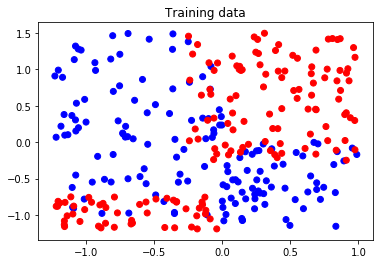

In [7]:
plt.scatter(x[:,[0]],x[:,[1]],c=y,cmap='bwr_r')
plt.title('Training data')
plt.show()

## Constructing the graph
#### The graph is constructed as a list of dicts.
#### Every dict represents a step in calculating the outcome of the network.
#### Every dict key is a neuron and its value is a list containing all the neurons feeding it.

#### For instance, let's build this network:

![image](Neural_Network - resized.png)

In [8]:
# Do note that the first layer is the input layer
layer_sizes=[2,5,3,1]

#dict containing all neurons in the graph
n={}

#must add one to weights size becouse of the bias
n[(1,0)]=neuron(weights=np.random.normal(size=2+1),activation=sigmoid)
n[(1,1)]=neuron(weights=np.random.normal(size=1+1),activation=sigmoid)
n[(1,2)]=neuron(weights=np.random.normal(size=2+1),activation=sigmoid)
n[(1,3)]=neuron(weights=np.random.normal(size=1+1),activation=sigmoid)
n[(1,4)]=neuron(weights=np.random.normal(size=2+1),activation=sigmoid)

n[(2,0)]=neuron(weights=np.random.normal(size=3+1),activation=sigmoid)
n[(2,1)]=neuron(weights=np.random.normal(size=2+1),activation=sigmoid)
n[(2,2)]=neuron(weights=np.random.normal(size=3+1),activation=sigmoid)

n[(3,0)]=neuron(weights=np.random.normal(size=5+1),activation=sigmoid)

#integers represent their respective coordinate on the x input data and not neurons.
graph=[{n[(1,0)]:[0,1],
        n[(1,1)]:[1],
        n[(1,2)]:[0,1],
        n[(1,3)]:[0],
        n[(1,4)]:[0,1]},
       
       {n[(2,0)]:[0,n[(1,1)],n[(1,2)]],
        n[(2,1)]:[n[(1,1)],n[(1,3)]],
        n[(2,2)]:[1,n[(1,2)],n[(1,3)]]},
       
       {n[(3,0)]:[n[(1,0)],n[(1,4)],n[(2,0)],n[(2,1)],n[(2,2)]]}]


Loss = 0.33726634698385527


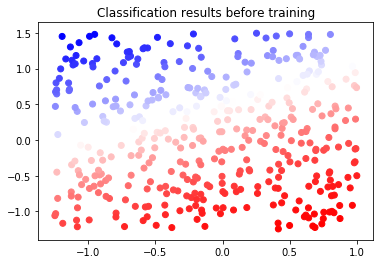

In [9]:
nn=neural_network(graph,cost=squared_error,alpha=10**(-2))
print('Loss = '+str(np.average(nn.evaluate(x,y))))
plt.scatter(x_test[:,[0]],x_test[:,[1]],c=nn.predict(x_test),cmap='bwr_r')
plt.title('Classification results before training')
plt.show()

Loss = 0.09894467701642201


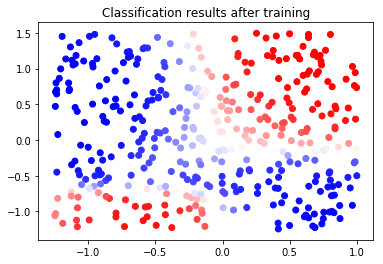

In [10]:
for i in range(2000):
    nn.fit(x,y)
    
print('Loss = '+str(np.average(nn.evaluate(x,y))))
plt.scatter(x_test[:,[0]],x_test[:,[1]],c=nn.predict(x_test),cmap='bwr_r')
plt.title('Classification results after training')
plt.show()

## Regularization and mini batches coming soon!